# Análisis exploratorio de los datos

El objetivo primario de este trabajo es llevar a cabo un análisis exploratorio de los datos contenidos en el archivo `pacientes_cancer.csv`. Para ello, será necesario realizar las siguientes tareas:

1. Entender qué representa cada variable y **eliminar las columnas innecesarias**.
2. **Distinguir entre columnas según el tipo** de variable (numérica, categórica, etc.)
3. Buscar **valores nulos** y **registros duplicados**.
4. Calcular **estadísticos descriptivos**:
    - Variables numéricas: *media*, *mediana*, *moda*, *cuartiles* y valores *máximo* y *mínimo*.
    - Variables categóricas: número de *categorías diferentes*, el valor de las *más y menos frecuentes*, y sus *frecuencias asociadas*.
5. Representar la **distribución** de los datos de la variable (*histograma*).

In [5]:
# módulos básicos para análisis y visualización de datos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Cargar datos

En primer lugar, se cargan los datos y se leen utilizando el método `.head()` sobre el objeto que contiene le data frame para mostrar las primeras filas y así hacernos una idea de los datos que contiene el archivo.

In [6]:
df = pd.read_csv('cancer_gene_expression_dataset.csv') # leer dataset
df.head() # mostrar las primeras filas

,Patient_ID,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,P001,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,P002,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,P003,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,P004,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,P005,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Supresión de columnas innecesarias

Atendiendo al documento en el que se explican las diferentes variables, podemos prescindir de la columna `Patient_ID`, ya que no ofrece información relevante (ya viene dada por el índice).

In [8]:
df = df.drop(columns = ['Patient_ID']) # eliminar columna irrelevante
df.head()

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,2.728821,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,2.992125,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,2.406773,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,2.915032,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,4.212290,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Estadísticos descriptivos 

Podemos obtener información general del dataset con el método `info()`:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP53    100 non-null    float64
 1   BRCA1   100 non-null    float64
 2   BRCA2   100 non-null    float64
 3   EGFR    100 non-null    float64
 4   KRAS    100 non-null    float64
 5   MYC     100 non-null    float64
 6   PTEN    100 non-null    float64
 7   RB1     100 non-null    float64
 8   APC     100 non-null    float64
 9   VHL     100 non-null    float64
 10  CDKN2A  100 non-null    float64
 11  PIK3CA  100 non-null    float64
 12  BRAF    100 non-null    float64
 13  NRAS    100 non-null    float64
 14  ERBB2   100 non-null    float64
 15  ALK     100 non-null    float64
 16  RET     100 non-null    float64
 17  MET     100 non-null    float64
 18  FGFR1   100 non-null    float64
 19  FGFR2   100 non-null    float64
 20  CDK4    100 non-null    float64
 21  CDK6    100 non-null    float64
 22  CCN

Todas las variables son numéricas y no hay presencia de valores nulos, así que no es necesario limpiar ni formatear los datos.

Para obtener estadísticos descriptivos de las variables, podemos utilizar el método `describe()`:

In [10]:
df.describe() # números enteros y reales, respectivamente

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.564368,0.621107,0.647325,0.651540,0.649910,0.609993,0.591527,0.654658,0.615342,0.768418,...,0.548199,0.614115,0.576009,0.486848,0.518716,0.527128,0.474388,0.490106,0.584352,0.546628
std,1.768274,1.774770,1.674977,1.741847,1.771320,1.665814,1.767049,1.842990,1.685256,1.781230,...,1.021494,1.139700,1.042993,0.994914,1.109193,1.096290,1.088611,1.175609,0.917804,1.092010
min,-2.847722,-2.807503,-2.567069,-2.332091,-2.177099,-2.608134,-2.579099,-3.070185,-2.687404,-2.213438,...,-0.937586,-1.460675,-1.033721,-0.782121,-1.264780,-1.123445,-1.348443,-1.495568,-0.776879,-0.928951
25%,-0.712626,-0.729151,-0.555345,-0.655722,-0.824549,-0.818286,-0.647376,-0.813309,-0.862052,-0.685428,...,-0.074217,-0.140486,-0.112279,-0.165772,-0.263892,-0.272676,-0.237959,-0.405425,-0.059142,-0.197554
50%,0.293465,0.402685,0.218273,0.179781,0.200899,0.321302,0.202253,0.179319,0.427116,0.306475,...,0.200861,0.276423,0.218374,0.140934,0.189176,0.218359,0.155563,0.106006,0.318130,0.165437
75%,2.297247,2.343236,2.271457,2.304849,2.515749,2.179464,2.384662,2.328705,2.202838,2.440812,...,0.882257,1.317875,1.083681,0.739940,1.050684,0.977860,0.931820,1.229496,0.945977,1.263827
max,3.800240,3.658024,3.635576,3.918180,4.144006,4.140825,3.604151,4.651548,3.500720,4.212290,...,2.998079,3.314082,3.033557,3.371548,3.258552,3.578233,3.253135,3.940957,3.139052,3.065894


## Distribución de los datos

Veamos la distribución de los datos. Por un lado, en forma de histogramas:

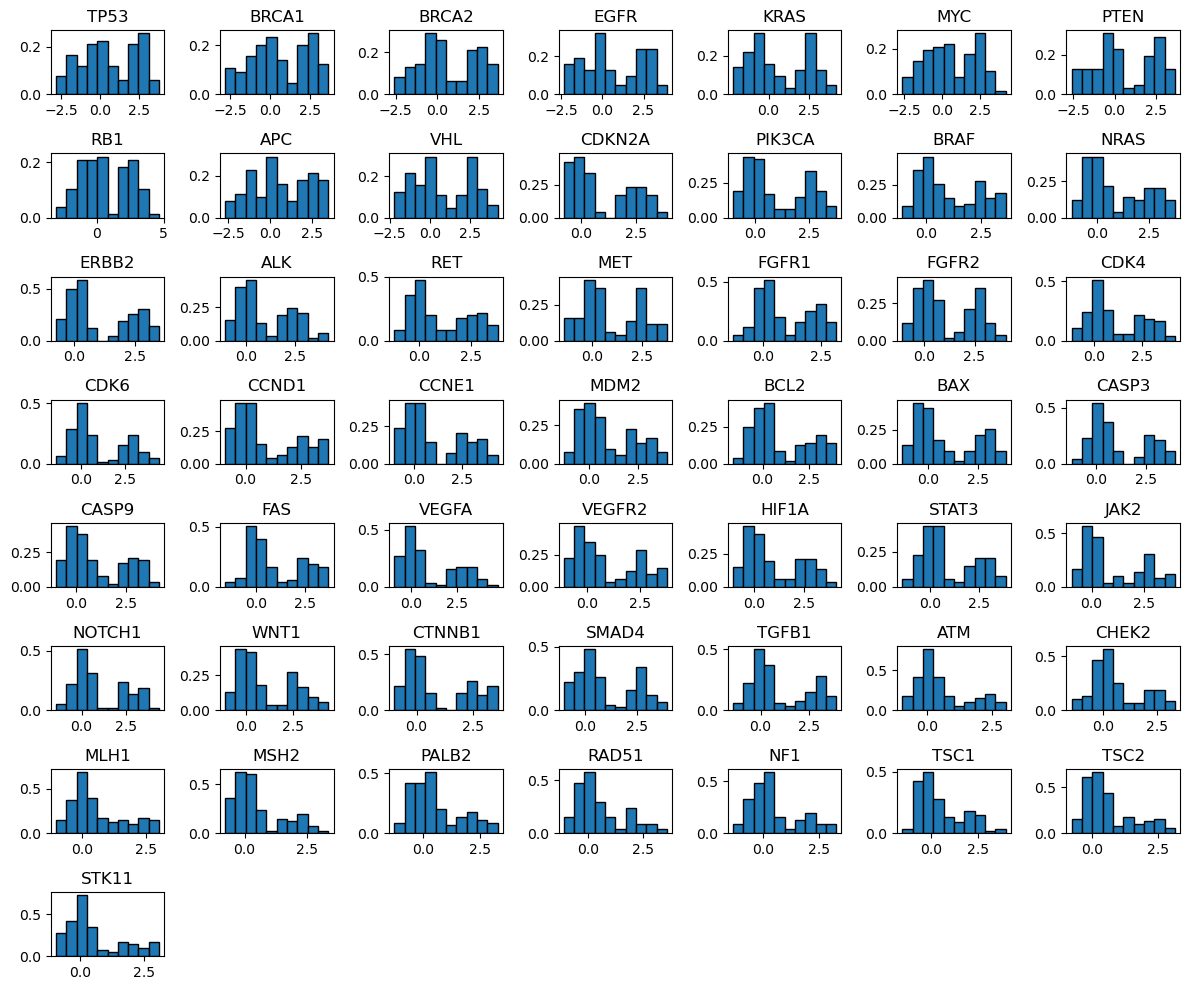

In [18]:
df.hist(edgecolor = "black", figsize=(12, 10), grid = False, density = True)
plt.tight_layout()
plt.show()

Se observa una distribución aproximadamente bimodal para todas las variables.

Por otro lado, los diagramas de cajas y bigotes:

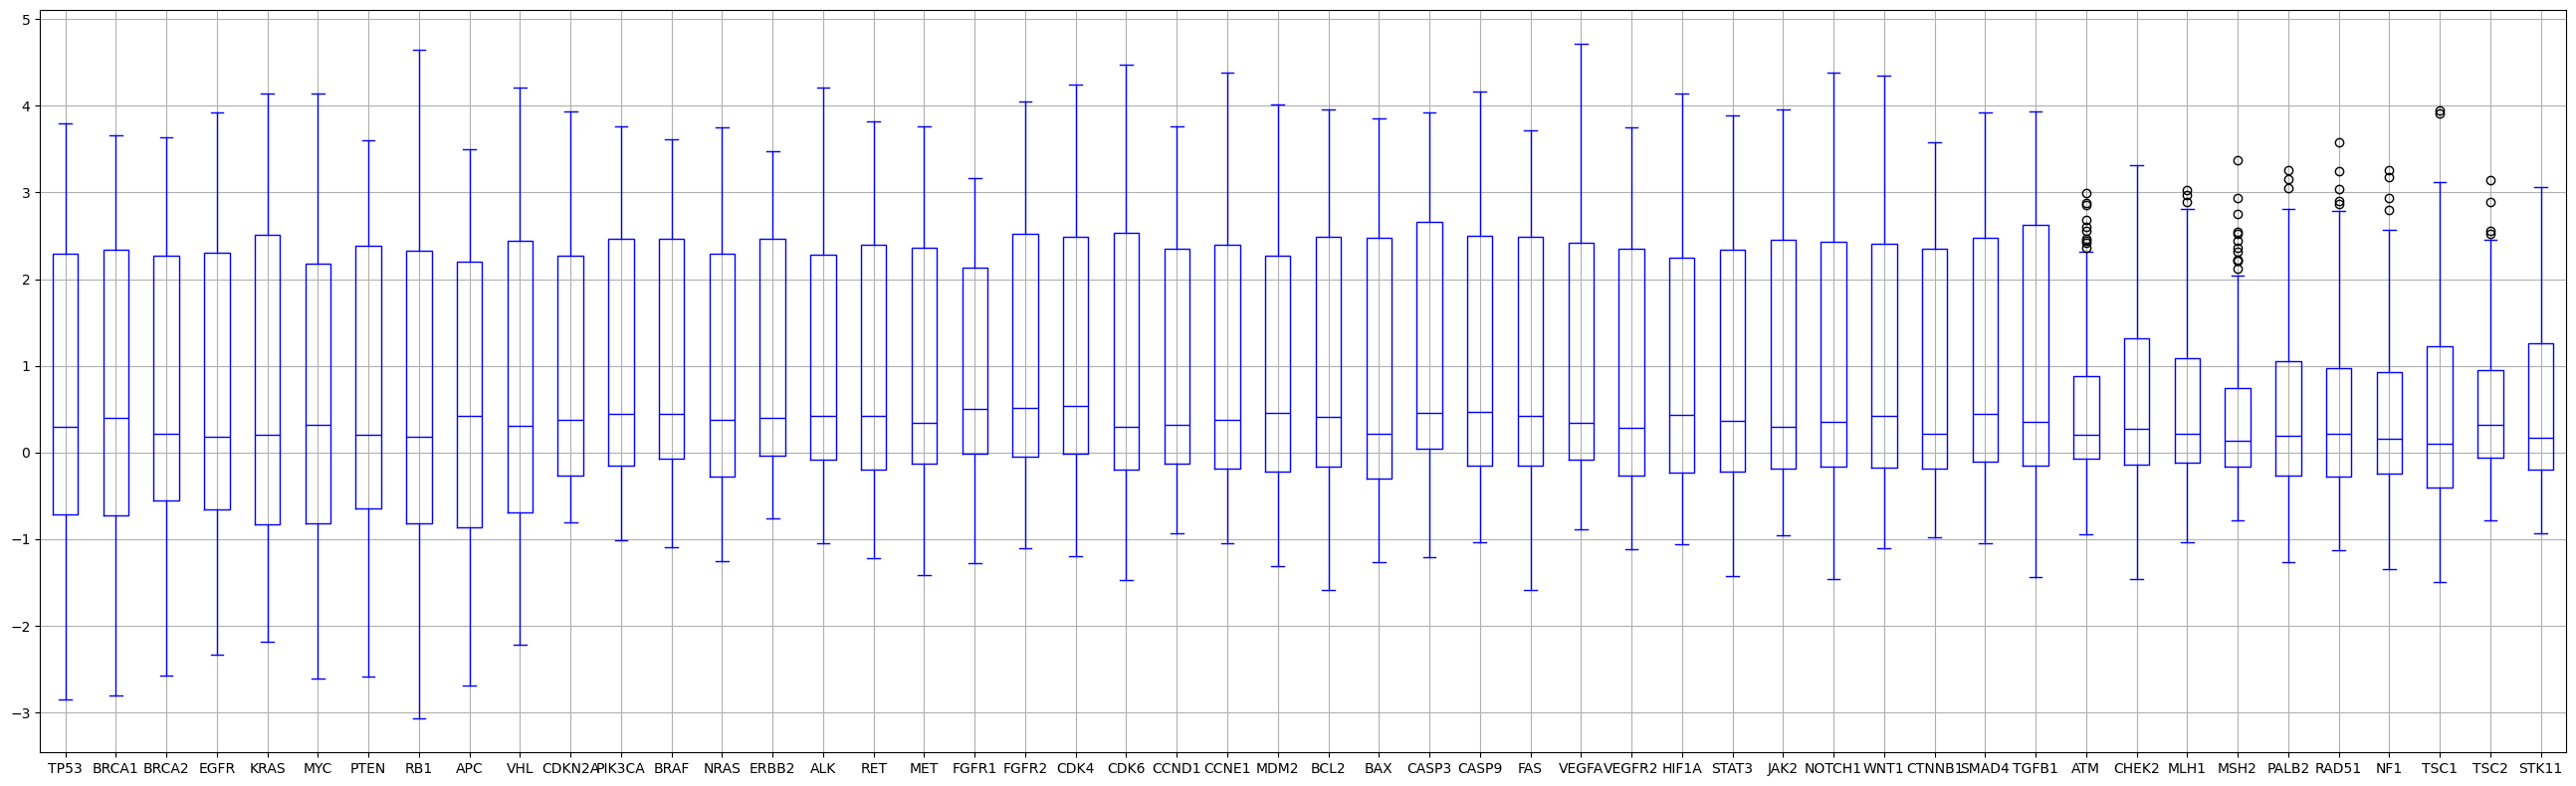

In [17]:
df.boxplot(color = "blue", figsize = (26, 8))
plt.tight_layout()
plt.show()

# Ingeniería de características